In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
df0 = pd.read_csv('extracted_features.csv')

In [4]:
df1 = pd.read_csv('extracted_featuresPD.csv')

In [5]:
df1['status'] = 1
df0['status'] = 0

In [6]:
combined_df = pd.concat([df1, df0], ignore_index=True)

In [7]:
combined_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,HNR,RPDE,DFA,Spread2,D2,PPE,status
0,126.353888,137.019936,120.319498,0.073286,13.645093,0.882038,0.011980,0.074907,1.805122e-15,0.620028,1
1,110.262920,139.360201,101.559411,0.064598,15.480307,0.893800,0.031702,0.066802,3.741641e-03,0.134044,1
2,236.978227,243.821467,216.051657,0.053526,18.682661,0.854475,0.001874,0.063927,2.267745e+00,0.115779,1
3,263.086609,316.902456,86.026909,0.058129,17.203112,0.841544,0.318238,0.065729,1.927009e+00,0.217718,1
4,161.322442,167.325671,152.281397,0.048261,20.720847,0.880209,0.174828,0.086217,1.602417e-15,0.744524,1


In [8]:
y = combined_df.pop('status')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(combined_df, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [12]:
xgbs = xgb.XGBClassifier()

In [13]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1.0, 1.5]
}

In [14]:
grid_search = GridSearchCV(
    estimator=xgbs,
    param_grid=param_grid,
    scoring='accuracy',     # You can adjust this to other metrics like 'roc_auc'
    cv=5,                   # Number of cross-validation folds
    verbose=1,
    n_jobs=-1               # Use all available processors
)

In [15]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15552 candidates, totalling 77760 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300, 500],
                         'reg_alpha': [0, 0.1, 0.5],
                         'reg_lambda': [0.5, 1.0, 1.5],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [16]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.8}
Best Cross-Validation Score: 0.7653846153846154


In [26]:
xgbm = xgb.XGBClassifier(
    colsample_bytree=0.6,
    learning_rate=0.2,
    max_depth=3,
    min_child_weight=1,
    n_estimators=100,
    reg_alpha=0.1,
    reg_lambda=1.5,
    subsample=0.8
)

In [27]:
xgbm.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
y_train_preds = xgbm.predict(X_train)
y_val_preds = xgbm.predict(X_test)

In [20]:
from joblib import dump

dump(xgbm, '../models/Custom_model.joblib')

['../models/Custom_model.joblib']

In [21]:
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
accuracy = acs(y_train, y_train_preds)
F1 = f1s(y_train, y_train_preds)
conf_matrix = confusion_matrix(y_train, y_train_preds)
report = classification_report(y_train, y_train_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1: {F1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

Accuracy: 1.0000
F1: 1.0000
Confusion Matrix:
[[35  0]
 [ 0 29]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        29

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [23]:
accuracy = acs(y_test, y_val_preds)
F1 = f1s(y_test, y_val_preds)
conf_matrix = confusion_matrix(y_test, y_val_preds)
report = classification_report(y_test, y_val_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1: {F1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

Accuracy: 0.7059
F1: 0.7619
Confusion Matrix:
[[4 2]
 [3 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.80      0.73      0.76        11

    accuracy                           0.71        17
   macro avg       0.69      0.70      0.69        17
weighted avg       0.72      0.71      0.71        17



ROC AUC Score: 1.0000


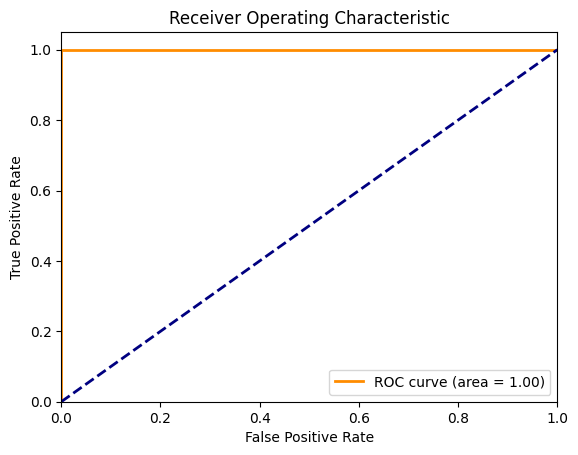

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Get the probability scores for the test set
y_train_prob = xgbm.predict_proba(X_train)[:, 1]  # Probability estimates for the positive class

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_train, y_train_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

ROC AUC Score: 0.6970


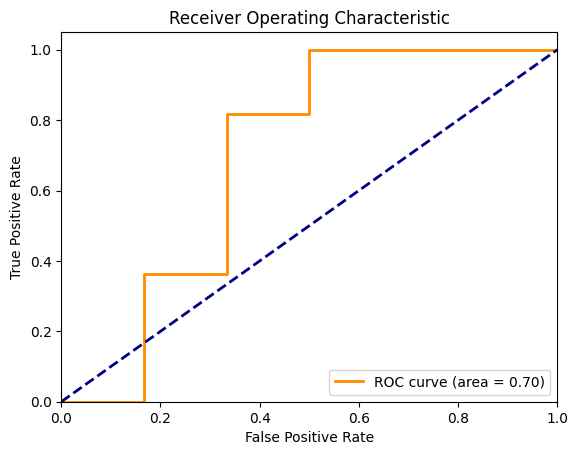

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Get the probability scores for the test set
y_valid_prob = xgbm.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_valid_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_valid_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()